In [13]:
import pandas as pd
from scipy.stats import pearsonr
import os
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
# # Read the file
# outfile = pd.read_excel('/Users/yiwengeng/Documents/PregnantPrj/Data/PLT_stats.xlsx',sheet_name='Summary')
# outfile.set_index(keys='SubjectID',append=True,inplace=True) # Set the index

# define all the variables
folder = '/Users/yiwengeng/Documents/PregnantPrj/Data/BIN_Data/'
# dirlist = ["PTL01","PTL02","PTL03","PTL05","PTL06","PTL07","PTL09","PTL10","PTL15"]
dirlist = ['BIN01','BIN02','BIN03','BIN04','BIN05','BIN06','BIN07','BIN08','BIN09','BIN10','BIN11','BIN12','BIN13','BIN14','BIN15','BIN16','BIN17','BIN18','BIN19','BIN20','BIN21','BIN23']
act_names=["activity_score", "score_meet_daily_targets","score_move_every_hour","score_stay_active","steps"]
hr_names=["bpm"]
spo2_names=["spo2"]
hrhrv_names=["5min_hr","5min_hrv"]
ready_names=["readiness_score", "score_previous_night","score_sleep_balance", 
             "score_previous_day","score_activity_balance","score_resting_hr",
             "score_hrv_balance","score_recovery_index","score_temperature"]
sleep_names=["sleep_score", "duration","efficiency","onset_latency","rmssd",
             "score_deep","score_efficiency","score_rem"]

df_act = {}
df_sleep = {}
df_ready = {}
df_hr = {}
df_hrhrv = {}
df_spo2 = {}

for dir in dirlist:
    ID = int(dir[-2:])
    os.chdir(folder+dir)
    files = sorted(os.listdir())
    # print("ID",ID)

    # activity
    df_act[ID] = pd.read_csv(files[0], parse_dates = [0])
    df_act[ID].rename(columns={'score':'activity_score'},inplace=True)
    df_act[ID]['ID'] =  ID
    df_act[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    # print('act',len(df_act[ID]))

    # sleep
    df_sleep[ID] = pd.read_csv(files[6], parse_dates = [0])
    df_sleep[ID].rename(columns={'score':'sleep_score'},inplace=True)
    df_sleep[ID]['ID'] =  ID
    df_sleep[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    # print('sleep',len(df_sleep[ID]))

    # readiness
    df_ready[ID] = pd.read_csv(files[4], parse_dates = [0])
    df_ready[ID].rename(columns={'score':'readiness_score'},inplace=True)
    df_ready[ID]['ID'] =  ID
    df_ready[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None
    # print('ready',len(df_ready[ID]))

    # daily_hr
    df_hr[ID] = pd.read_csv(files[1], parse_dates = [0])
    df_hr[ID]['ID'] =  ID
    df_hr[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None    
    # print('hr',len(df_hr[ID]))

    # hr_hrv
    df_hrhrv[ID] = pd.read_csv(files[3], parse_dates = [0])
    df_hrhrv[ID].rename(columns={'5-min hr':'5min_hr','5-min hrv':'5min_hrv'},inplace=True)
    df_hrhrv[ID]['ID'] =  ID
    df_hrhrv[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None   
    df_hrhrv[ID] = df_hrhrv[ID].loc[df_hrhrv[ID]['5min_hr'] != 0]
    df_hrhrv[ID]['timestamp'] = pd.to_datetime(df_hrhrv[ID]['timestamp'], utc=True)
    df_hrhrv[ID]['days_from_start'] = (df_hrhrv[ID]['timestamp'] - df_hrhrv[ID]['timestamp'].min()).dt.days
    df_hrhrv[ID]['Date'] = pd.to_datetime(df_hrhrv[ID]['timestamp'].dt.date, utc=True)
    # print("hrhrv",len(df_hrhrv[ID]))

    # spo2
    df_spo2[ID] = pd.read_csv(files[2], parse_dates = [0])
    df_spo2[ID].rename(columns={'average spo2':'spo2'},inplace=True)
    df_spo2[ID]['ID'] =  ID
    df_spo2[ID]['Trama'] = 0 if ID in [1,2,9,10,12,13,15,18] else 1 if ID in [3,5,6,7,11,14,16,17] else None    
    # print('spo2',len(df_spo2[ID]))

    # print("*"*20)
    

In [2]:
df_AWS = pd.read_csv("/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/BIN_AWS.csv")
df_MBI = pd.read_csv("/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/BIN_MBIHSS.csv")

In [3]:
AWS_colums = ['Participant ID','Workload', 'Control',
       'Reward', 'Community', 'Fairness', 'Values']
df_AWS = df_AWS[AWS_colums]
MBI_colums = ['Participant ID','EE Total Score', 'EE Average', 'DP Total Score',
       'DP Average Score', 'PA Total Score', 'PA Average Score']
df_MBI = df_MBI[MBI_colums]
df_AWS.rename(columns={'Participant ID':'ID'},inplace=True)
df_MBI.rename(columns={'Participant ID':'ID'},inplace=True)

In [9]:
df_AWS['Workload_level'] = df_AWS['Workload'].apply(lambda x: 0 if x >= 3 else 1)
df_AWS['Control_level'] = df_AWS['Control'].apply(lambda x: 0 if x >= 3 else 1)
df_AWS['Reward_level'] = df_AWS['Reward'].apply(lambda x: 0 if x >= 3 else 1)
df_AWS['Community_level'] = df_AWS['Community'].apply(lambda x: 0 if x >= 3 else 1)
df_AWS['Fairness_level'] = df_AWS['Fairness'].apply(lambda x: 0 if x >= 3 else 1)
df_AWS['Values_level'] = df_AWS['Values'].apply(lambda x: 0 if x >= 3 else 1)

df_MBI['EE_Total_level'] = df_MBI['EE Total Score'].apply(lambda x: 1 if x >= 27 else 0)
df_MBI['DP_Total_level'] = df_MBI['DP Total Score'].apply(lambda x: 1 if x >= 10 else 0)
df_MBI['PA_Total_level'] = df_MBI['PA Total Score'].apply(lambda x: 1 if x <= 33 else 0)

In [ ]:
AWS_colums = ['Participant ID','Workload', 'Control',
       'Reward', 'Community', 'Fairness', 'Values']
MBI_colums = ['Participant ID','EE Total Score', 'EE Average', 'DP Total Score',
       'DP Average Score', 'PA Total Score', 'PA Average Score']


/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/yiwengeng/.pyenv/versions/miniconda3-latest/lib/pytho

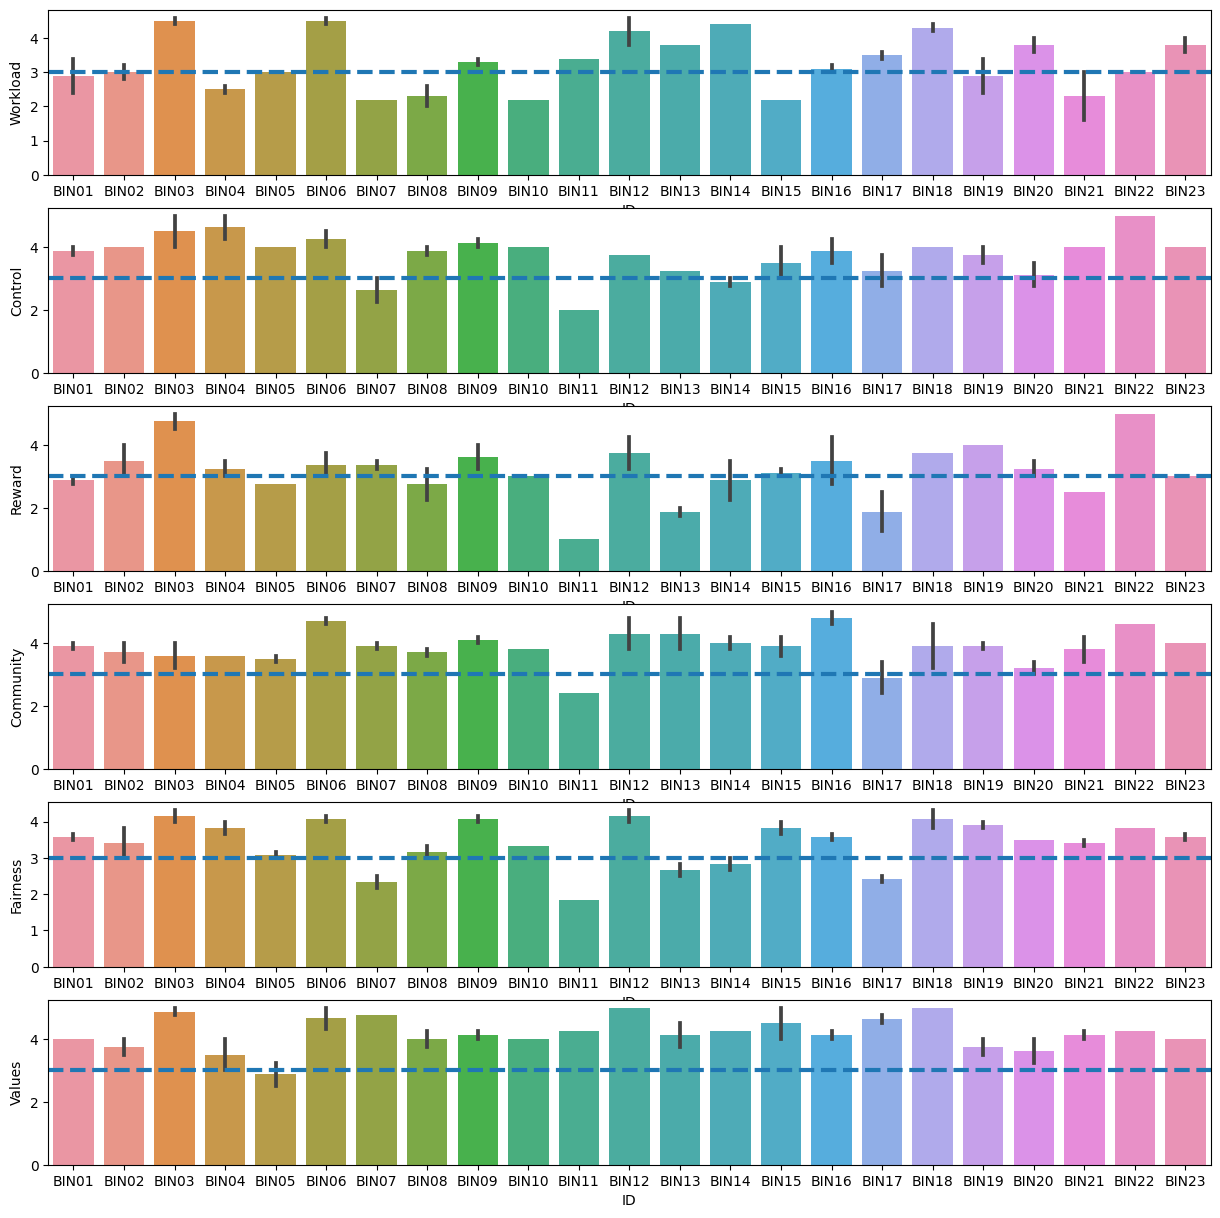

In [29]:
fig, [ax1,ax2,ax3,ax4,ax5,ax6] = plt.subplots(6,figsize=(15, 15))
sns.barplot(x="ID", y="Workload", data=df_AWS,ax=ax1)
ax1.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)
    
sns.barplot(x="ID", y="Control", data=df_AWS,ax=ax2)
ax2.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)
sns.barplot(x="ID", y="Reward", data=df_AWS,ax=ax3)
ax3.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)
sns.barplot(x="ID", y="Community", data=df_AWS,ax=ax4)
ax4.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)
sns.barplot(x="ID", y="Fairness", data=df_AWS,ax=ax5)
ax5.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)
sns.barplot(x="ID", y="Values", data=df_AWS,ax=ax6)
ax6.axhline(y=3, color="tab:blue", linestyle='dashed', linewidth=3)

In [33]:
print(df_AWS['Workload_level'].sum())
print(df_AWS['Control_level'].sum())
print(df_AWS['Reward_level'].sum())
print(df_AWS['Community_level'].sum())
print(df_AWS['Fairness_level'].sum())
print(df_AWS['Values_level'].sum())

21
11
25
6
15
5


In [11]:
df_AWS.to_csv("/Users/yiwengeng/Documents/PregnantPrj/Code/BIN/AWS.csv")

In [10]:
print(df_AWS.head())

      ID  Workload  Control  Reward  Community  Fairness  Values  \
0  BIN01       2.4     4.00    3.00        4.0     3.500     4.0   
1  BIN01       3.4     3.75    2.75        3.8     3.667     4.0   
2  BIN02       3.2     4.00    4.00        4.0     3.833     4.0   
3  BIN02       2.8     4.00    3.00        3.4     3.000     3.5   
4  BIN03       4.6     5.00    5.00        3.2     4.000     5.0   

   Workload_level  Control_level  Reward_level  Community_level  \
0               1              0             0                0   
1               0              0             1                0   
2               0              0             0                0   
3               1              0             0                0   
4               0              0             0                0   

   Fairness_level  Values_level  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0 